In [1]:
# 단순회귀 분석 예측

pip install pandas_datareader

In [1]:
# 
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 

# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# FinanceDataReader 에서 대한항공 데이터 가지고 오기
# 5년일별데이터  (Y)

df = fdr.DataReader("003490","2018-01-01","2023-07-31")
df_koreaair = df[["Close"]]
df_koreaair

,Close
Date,
2018-01-02,23278
2018-01-03,23181
2018-01-04,22630
2018-01-05,22630
2018-01-08,23408
...,...
2023-07-25,24750
2023-07-26,24150
2023-07-27,24700


In [3]:
# 서부 텍사스 중질유(WTI Crude), monthly: FEATURE
df_oil = pdr.DataReader('POILDUBUSDM', 'fred', start='2018-01-01')

print('row count:', len(df_oil))
df_oil.tail(10)
df_oil.columns = ["유가데이터"]
df_oil

row count: 70


,유가데이터
DATE,
2018-01-01,66.024783
2018-02-01,62.631000
2018-03-01,63.917273
2018-04-01,68.667143
2018-05-01,74.077826
...,...
2023-06-01,74.729545
2023-07-01,80.645714
2023-08-01,86.123043


In [4]:
# 주가 DATA : 월말 데이터로 변경
df_koreaair  = df_koreaair.resample('M').last()
df_oil  = df_oil.resample('M').last()

In [5]:
df_oil["월수익률_유가"] = df_oil["유가데이터"].pct_change()
df_oil.dropna(inplace=True)
df_oil.reset_index(inplace=True)
df_oil

,DATE,유가데이터,월수익률_유가
0,2018-02-28,62.631000,-0.051402
1,2018-03-31,63.917273,0.020537
2,2018-04-30,68.667143,0.074313
3,2018-05-31,74.077826,0.078796
4,2018-06-30,73.311429,-0.010346
...,...,...,...
64,2023-06-30,74.729545,-0.000797
65,2023-07-31,80.645714,0.079168
66,2023-08-31,86.123043,0.067918
67,2023-09-30,93.238571,0.082620


In [6]:
df_koreaair["월수익률_대한항공"] = df_koreaair["Close"].pct_change()
df_koreaair.dropna(inplace=True)
df_koreaair.reset_index(inplace=True)
df_koreaair

,Date,Close,월수익률_대한항공
0,2018-02-28,21171,-0.153024
1,2018-03-31,21916,0.035190
2,2018-04-30,22144,0.010403
3,2018-05-31,20717,-0.064442
4,2018-06-30,18318,-0.115799
...,...,...,...
61,2023-03-31,23200,0.019780
62,2023-04-30,22850,-0.015086
63,2023-05-31,22100,-0.032823
64,2023-06-30,24350,0.101810


In [7]:
# 데이터 합치기 
df_all = pd.concat([df_koreaair,df_oil[["유가데이터","월수익률_유가"]]],axis=1)
df_all.dropna(inplace=True)
df_all

,Date,Close,월수익률_대한항공,유가데이터,월수익률_유가
0,2018-02-28,21171.0,-0.153024,62.631000,-0.051402
1,2018-03-31,21916.0,0.035190,63.917273,0.020537
2,2018-04-30,22144.0,0.010403,68.667143,0.074313
3,2018-05-31,20717.0,-0.064442,74.077826,0.078796
4,2018-06-30,18318.0,-0.115799,73.311429,-0.010346
...,...,...,...,...,...
61,2023-03-31,23200.0,0.019780,78.270870,-0.036963
62,2023-04-30,22850.0,-0.015086,83.408500,0.065639
63,2023-05-31,22100.0,-0.032823,74.789130,-0.103339
64,2023-06-30,24350.0,0.101810,74.729545,-0.000797


In [8]:
df_all = df_all[["월수익률_대한항공","월수익률_유가"]]
df_all

,월수익률_대한항공,월수익률_유가
0,-0.153024,-0.051402
1,0.035190,0.020537
2,0.010403,0.074313
3,-0.064442,0.078796
4,-0.115799,-0.010346
...,...,...
61,0.019780,-0.036963
62,-0.015086,0.065639
63,-0.032823,-0.103339
64,0.101810,-0.000797


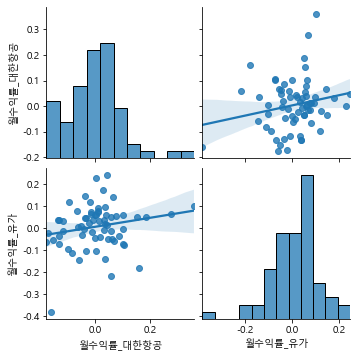

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import yfinance as yf
# 상관분석
sns.pairplot(df_all, kind='reg')

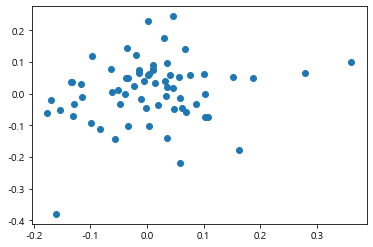

In [10]:
plt.scatter(df_all["월수익률_대한항공"], df_all["월수익률_유가"]) 

In [11]:
# 상관계수 확인
import scipy.stats

df_all.corr()


,월수익률_대한항공,월수익률_유가
월수익률_대한항공,1.00000,0.20224
월수익률_유가,0.20224,1.00000


In [12]:
# 통계적 검증 0.05
scipy.stats.pearsonr(df_all["월수익률_대한항공"], df_all["월수익률_유가"])

(0.20224007551414364, 0.10342100257005413)

In [13]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [14]:
# 회귀분석
# 필요한 라이브러리

import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.

target = df_all['월수익률_대한항공']
feature = df_all["월수익률_유가"]

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.

feature_add = sm.add_constant(feature, has_constant='add')

# 상수항 더한 것 확인
# feature_add

In [15]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              월수익률_대한항공   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2.729
Date:                Tue, 05 Dec 2023   Prob (F-statistic):              0.103
Time:                        16:50:12   Log-Likelihood:                 60.620
No. Observations:                  66   AIC:                            -117.2
Df Residuals:                      64   BIC:                            -112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.012      0.229      0.820      -0.021       0.027
월수익률_유가        0.2004      0.121      1.652      0.103      -0.042       0.443
==============================================================================
Omnibus:                       11.933   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.340
Skew:                           0.827   Prob(JB):                      0.00127
Kurtosis:                       4.454   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""